In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
file_path = 'AAPL.csv'
df = pd.read_csv(file_path)
print(df.head())
df.shape

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.478997  493729600
1  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.490201  601904800
2  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.386963  552160000
3  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.375156  477131200
4  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.417541  447610800


(2515, 7)

In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170494,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236229,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609901,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583099,146266000
2514,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.002029,144114400


In [4]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386963,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800


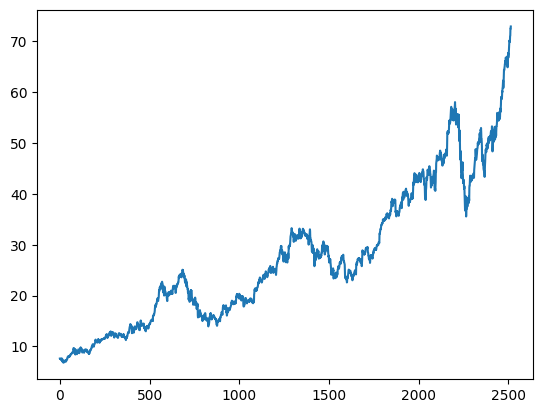

In [6]:
plt.plot(df.Close)

In [7]:
df

,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...
2510,2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,2513,72.779999,73.492500,72.029999,72.449997,146266000


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

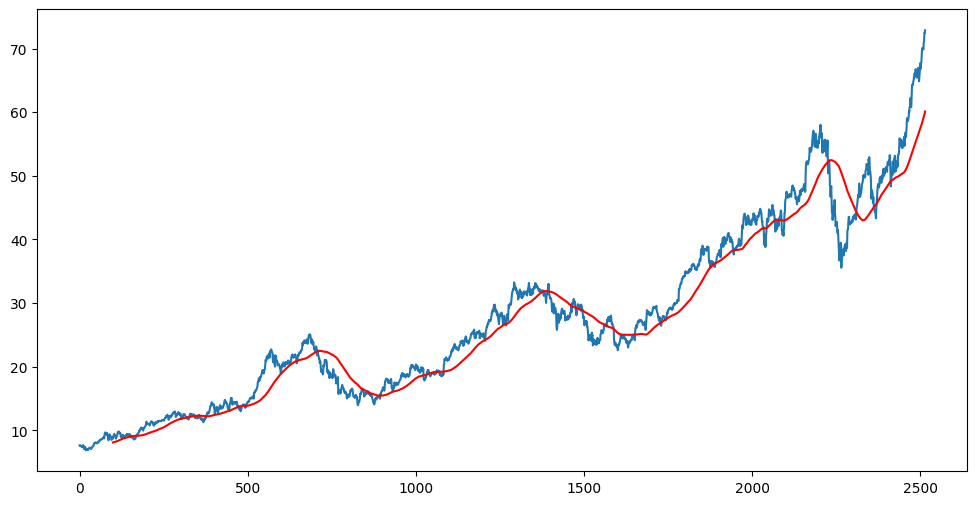

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

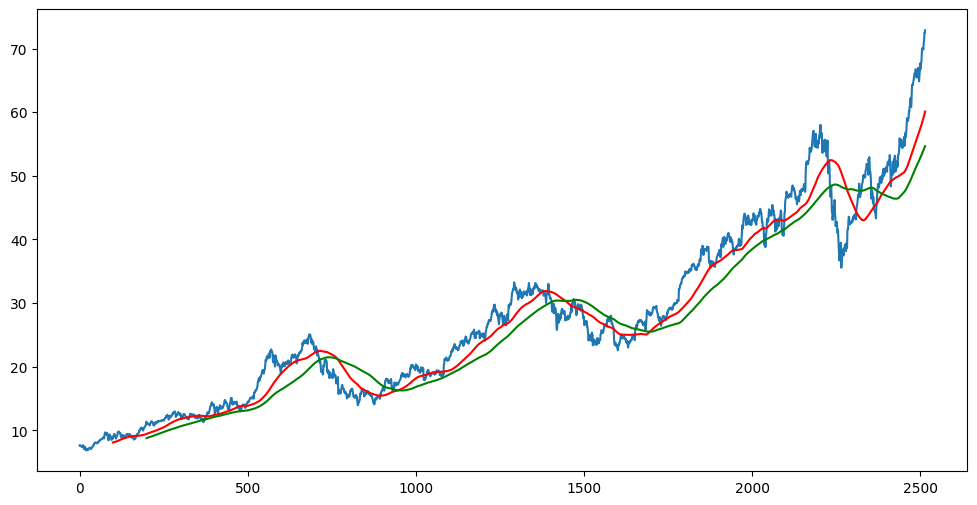

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [13]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021855],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089658],
       [0.84616013]])

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

52/52 [==============================] - 31s 345ms/step - loss: 0.0729
Epoch 2/50
52/52 [==============================] - 17s 330ms/step - loss: 0.0150
Epoch 3/50
52/52 [==============================] - 17s 327ms/step - loss: 0.0120
Epoch 4/50
52/52 [==============================] - 17s 328ms/step - loss: 0.0116
Epoch 5/50
52/52 [==============================] - 17s 325ms/step - loss: 0.0104
Epoch 6/50
52/52 [==============================] - 17s 326ms/step - loss: 0.0090
Epoch 7/50
52/52 [==============================] - 17s 327ms/step - loss: 0.0093
Epoch 8/50
52/52 [==============================] - 17s 331ms/step - loss: 0.0081
Epoch 9/50
52/52 [==============================] - 17s 328ms/step - loss: 0.0087
Epoch 10/50
52/52 [==============================] - 17s 327ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 17s 329ms/step - loss: 0.0078
Epoch 12/50
52/52 [==============================] - 17s 328ms/step - loss: 0.0067
Epoch 13/50

In [30]:
model.save('my_model.keras')

In [31]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [33]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [35]:
past_100_days = data_training.tail(100)

In [40]:
frames = [past_100_days, data_testing]
final_df = pd.concat(frames, ignore_index=True)

In [42]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781468],
       [0.03015022],
       [0.02585065],
       [0.02547908],
       [0.02680612],
       [0.03370672],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855782],
       [0.03036257],
       [0.0260099 ],
       [0.02356815],
       [0.02022405],
       [0.01958705],
       [0.01523438],
       [0.01576519],
       [0.01910934],
       [0.02441748],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226184],
       [0.02558522],
       [0.04586231],
       [0.06603325],
       [0.06258296],
       [0.05547006],
       [0.05541698],
       [0.05531084],
       [0.06099054],
       [0.05085198],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803867],
       [0.05265677],
       [0.04984341],
       [0.05239134],
       [0.05265677],
       [0.05711558],
       [0.05801794],
       [0.06858118],
       [0.06990821],
       [0.07542864],
       [0.073

In [44]:
input_data.shape

(855, 1)

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [48]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 5s 122ms/step


In [49]:
y_predicted.shape

(755, 1)

In [50]:
y_test

array([0.07219071, 0.06736029, 0.06911197, 0.06842189, 0.07155372,
       0.07845432, 0.08418706, 0.08482406, 0.08822127, 0.0855672 ,
       0.08445249, 0.0895483 , 0.0894952 , 0.08838051, 0.0895483 ,
       0.08997295, 0.08938906, 0.09952758, 0.09984611, 0.09989915,
       0.09820055, 0.09671429, 0.13599451, 0.13482672, 0.13774619,
       0.144169  , 0.15075113, 0.15345824, 0.15547537, 0.15388291,
       0.16009341, 0.16927655, 0.1718775 , 0.17102826, 0.17299223,
       0.17819418, 0.18037054, 0.17729182, 0.1779819 , 0.17941503,
       0.17973358, 0.1945963 , 0.19019063, 0.19454326, 0.19220766,
       0.19316317, 0.19040292, 0.18870427, 0.19114606, 0.19146452,
       0.19034986, 0.19815284, 0.19937369, 0.19565799, 0.20346098,
       0.19486173, 0.20324861, 0.20059454, 0.19910826, 0.20038224,
       0.215882  , 0.21758056, 0.21657199, 0.21513886, 0.21535114,
       0.22103089, 0.21704979, 0.21513886, 0.21344021, 0.21253785,
       0.20436334, 0.20526572, 0.20128462, 0.20542495, 0.20208

In [51]:
y_predicted

array([[0.10647   ],
       [0.10694399],
       [0.1074637 ],
       [0.10801636],
       [0.10859133],
       [0.10917336],
       [0.10975026],
       [0.11031784],
       [0.11087732],
       [0.1114334 ],
       [0.11199196],
       [0.11255024],
       [0.11310194],
       [0.11364599],
       [0.1141786 ],
       [0.11469658],
       [0.11519884],
       [0.11568534],
       [0.11615542],
       [0.11661805],
       [0.11707033],
       [0.11751631],
       [0.11795677],
       [0.11841157],
       [0.11893739],
       [0.1195702 ],
       [0.12034057],
       [0.12127842],
       [0.12240569],
       [0.12373266],
       [0.12521654],
       [0.12684965],
       [0.12864807],
       [0.13062765],
       [0.13279277],
       [0.13513921],
       [0.13766004],
       [0.14035024],
       [0.14319225],
       [0.14615928],
       [0.14922547],
       [0.1523626 ],
       [0.15557335],
       [0.15885566],
       [0.1622014 ],
       [0.1655811 ],
       [0.16896327],
       [0.172

In [53]:
scaler.scale_

array([0.02123255])

In [55]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

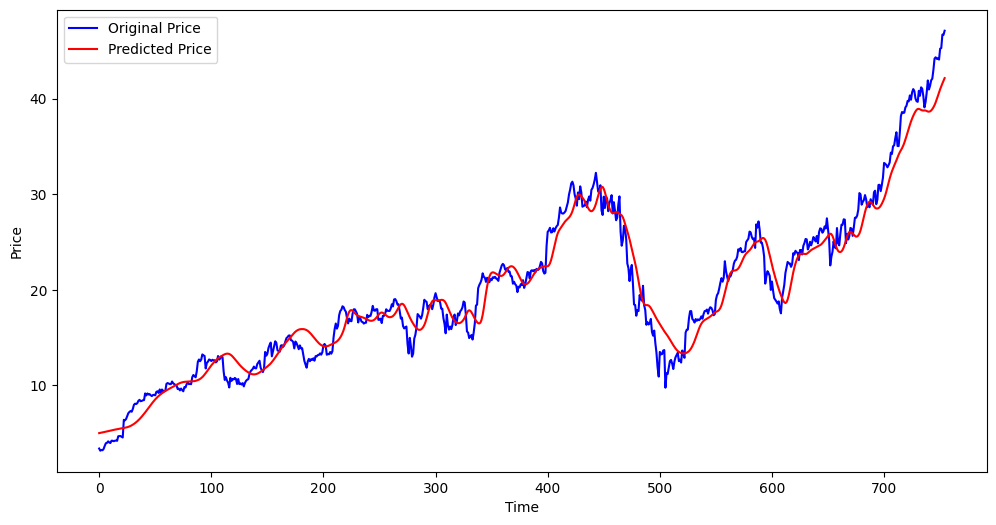

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()